In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv("/home/sathish/Documents/car_resale_prices.csv")

In [3]:
df.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [4]:
df.isnull().sum()

Unnamed: 0             0
full_name              0
resale_price           0
registered_year       69
engine_capacity       14
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            102
seats                 10
mileage              508
body_type              0
city                   0
dtype: int64

In [5]:
df.shape

(17446, 15)

In [6]:
columns_to_impute=['full_name','resale_price','registered_year','engine_capacity','insurance','transmission_type','kms_driven','owner_type','fuel_type','max_power','seats','mileage','body_type','city']
for i in columns_to_impute:
    print("how many unique value for ",i," : ",df[i].nunique())

how many unique value for  full_name  :  6923
how many unique value for  resale_price  :  1738
how many unique value for  registered_year  :  243
how many unique value for  engine_capacity  :  156
how many unique value for  insurance  :  7
how many unique value for  transmission_type  :  2
how many unique value for  kms_driven  :  8285
how many unique value for  owner_type  :  5
how many unique value for  fuel_type  :  5
how many unique value for  max_power  :  609
how many unique value for  seats  :  9
how many unique value for  mileage  :  587
how many unique value for  body_type  :  26
how many unique value for  city  :  13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  object 
 3   registered_year    17377 non-null  object 
 4   engine_capacity    17432 non-null  object 
 5   insurance          17439 non-null  object 
 6   transmission_type  17446 non-null  object 
 7   kms_driven         17443 non-null  object 
 8   owner_type         17401 non-null  object 
 9   fuel_type          17446 non-null  object 
 10  max_power          17344 non-null  object 
 11  seats              17436 non-null  float64
 12  mileage            16938 non-null  object 
 13  body_type          17446 non-null  object 
 14  city               17446 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.0+ MB


In [8]:
x=df[['registered_year','engine_capacity','insurance','kms_driven','owner_type','max_power','seats','mileage']]


<Axes: >

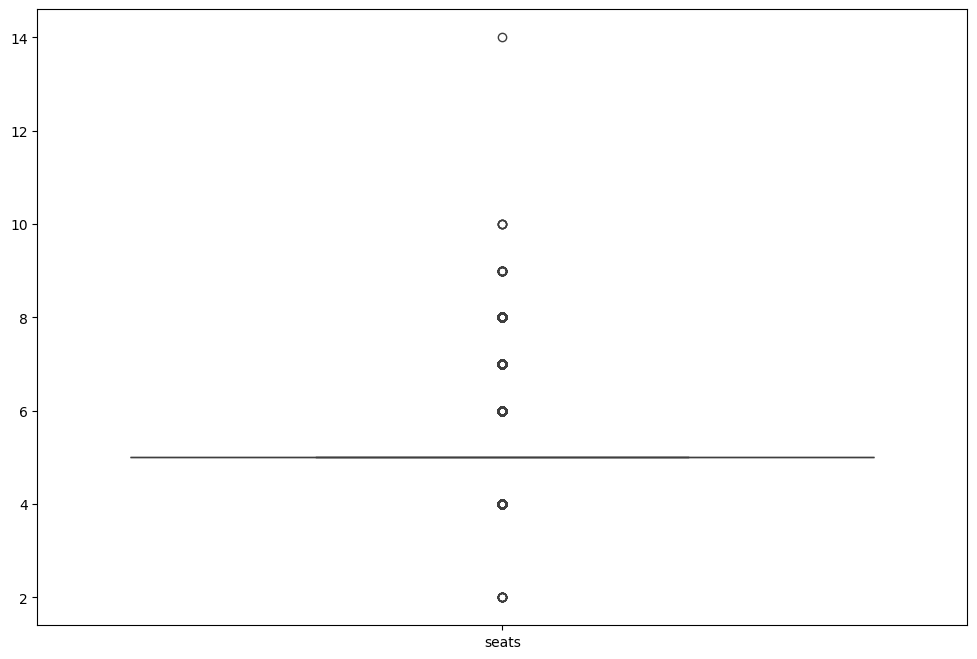

In [9]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.boxplot(x)

            

In [10]:
df.isnull().sum()

Unnamed: 0             0
full_name              0
resale_price           0
registered_year       69
engine_capacity       14
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            102
seats                 10
mileage              508
body_type              0
city                   0
dtype: int64

In [11]:
x = df[['registered_year', 'engine_capacity', 'insurance', 'kms_driven', 'owner_type', 'max_power', 'seats', 'mileage']]

# Calculate mode for each column
modes = {}
for col in x.columns:
    modes[col] = df[col].mode()[0]

# Fill missing values in each column with its respective mode
for col in x.columns:
    df[col].fillna(modes[col], inplace=True)

/tmp/ipykernel_4484/3879557476.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(modes[col], inplace=True)


In [12]:
df.isnull().sum()

Unnamed: 0           0
full_name            0
resale_price         0
registered_year      0
engine_capacity      0
insurance            0
transmission_type    0
kms_driven           0
owner_type           0
fuel_type            0
max_power            0
seats                0
mileage              0
body_type            0
city                 0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  object 
 3   registered_year    17446 non-null  object 
 4   engine_capacity    17446 non-null  object 
 5   insurance          17446 non-null  object 
 6   transmission_type  17446 non-null  object 
 7   kms_driven         17446 non-null  object 
 8   owner_type         17446 non-null  object 
 9   fuel_type          17446 non-null  object 
 10  max_power          17446 non-null  object 
 11  seats              17446 non-null  float64
 12  mileage            17446 non-null  object 
 13  body_type          17446 non-null  object 
 14  city               17446 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.0+ MB


In [14]:
import re
import pandas as pd
def extract_number(s):
    num = re.sub(r'[^\d\.]+', '', s)
    num = int(float(num) * 100000)  # convert lakh to integer
    return num
columns_to_convert = ['resale_price']
for col in columns_to_convert:
    df[col] = df[col].apply(extract_number)

In [15]:
df.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,545000,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,1000000,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,450000,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,450000,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,160000,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [16]:
import re
import pandas as pd
def extract_number(s):
    num = re.sub(r'[^\d\.]+', '', s)
    num = int(float(num))  # convert lakh to integer
    return num
columns_to_convert = ['engine_capacity','kms_driven','max_power','mileage']
for col in columns_to_convert:
    df[col] = df[col].apply(extract_number)

In [17]:
df.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,545000,2017,1197,Third Party insurance,Manual,40000,First Owner,Petrol,83,5.0,21,Hatchback,Agra
1,1,2018 Tata Hexa XTA,1000000,2018,2179,Third Party insurance,Automatic,70000,First Owner,Diesel,153,7.0,17,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,450000,2015,1197,Third Party insurance,Manual,70000,Second Owner,Petrol,83,5.0,20,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,450000,2015,1197,Third Party insurance,Manual,70000,Second Owner,Petrol,83,5.0,20,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,160000,2009,1086,Third Party insurance,Manual,80000,First Owner,Petrol,68,5.0,19,Hatchback,Agra


In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = ['insurance', 'transmission_type', 'owner_type', 'fuel_type','body_type','city'] 
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [19]:
df.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,545000,2017,1197,5,1,40000,1,4,83,5.0,21,7,0
1,1,2018 Tata Hexa XTA,1000000,2018,2179,5,0,70000,1,1,153,7.0,17,12,0
2,2,2015 Maruti Swift Dzire VXI,450000,2015,1197,5,1,70000,3,4,83,5.0,20,20,0
3,3,2015 Maruti Swift Dzire VXI,450000,2015,1197,5,1,70000,3,4,83,5.0,20,20,0
4,4,2009 Hyundai i10 Magna 1.1,160000,2009,1086,5,1,80000,1,4,68,5.0,19,7,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  int64  
 3   registered_year    17446 non-null  object 
 4   engine_capacity    17446 non-null  int64  
 5   insurance          17446 non-null  int64  
 6   transmission_type  17446 non-null  int64  
 7   kms_driven         17446 non-null  int64  
 8   owner_type         17446 non-null  int64  
 9   fuel_type          17446 non-null  int64  
 10  max_power          17446 non-null  int64  
 11  seats              17446 non-null  float64
 12  mileage            17446 non-null  int64  
 13  body_type          17446 non-null  int64  
 14  city               17446 non-null  int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 2.0+ MB


In [21]:
import pandas as pd
columns_to_convert = ['registered_year']

for col in columns_to_convert:
    df[col] = df[col].str.extract('(\d{4})', expand=False).astype('int64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  int64  
 3   registered_year    17446 non-null  int64  
 4   engine_capacity    17446 non-null  int64  
 5   insurance          17446 non-null  int64  
 6   transmission_type  17446 non-null  int64  
 7   kms_driven         17446 non-null  int64  
 8   owner_type         17446 non-null  int64  
 9   fuel_type          17446 non-null  int64  
 10  max_power          17446 non-null  int64  
 11  seats              17446 non-null  float64
 12  mileage            17446 non-null  int64  
 13  body_type          17446 non-null  int64  
 14  city               17446 non-null  int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 2.0+ MB


In [23]:
x=df[['resale_price','registered_year','engine_capacity','insurance','transmission_type','kms_driven','owner_type','fuel_type','max_power','seats','mileage','body_type','city']]


<Axes: >

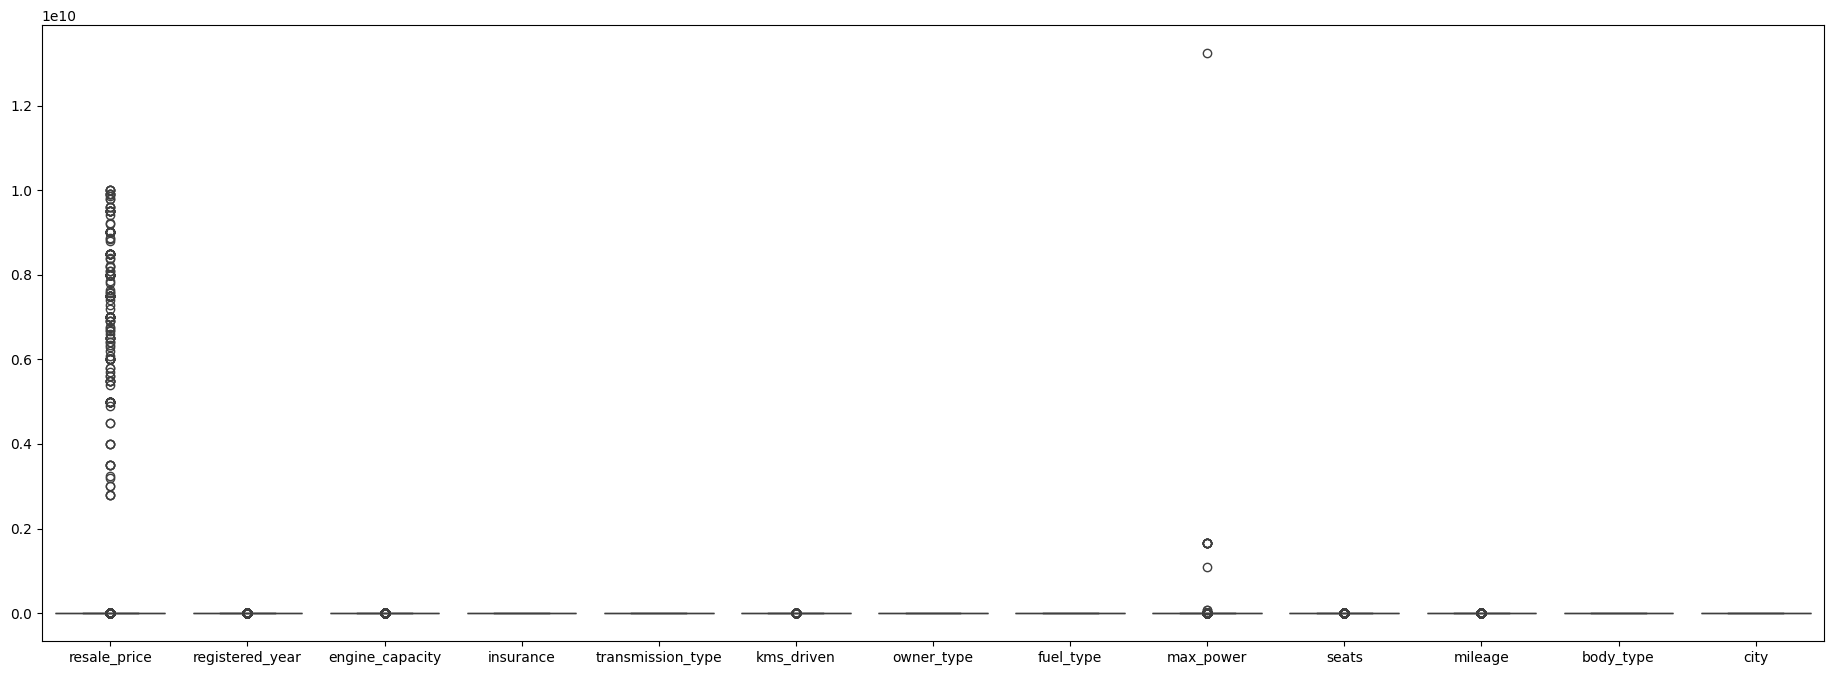

In [24]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(23,8))
sns.boxplot(x)

            

In [25]:
df.shape

(17446, 15)

In [26]:
feature=df[['resale_price','registered_year','engine_capacity','insurance','transmission_type','kms_driven','owner_type','fuel_type','max_power','seats','mileage','body_type','city']]

In [27]:
def remove_outliers_iqr(df, feature):
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df [(df [feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [28]:
columns_to_clean = ['resale_price','registered_year','engine_capacity','insurance','transmission_type','kms_driven','owner_type','fuel_type','max_power','seats','mileage','body_type','city']
for col in columns_to_clean:
    df = remove_outliers_iqr(df, col)

In [29]:
df.shape

(10031, 15)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

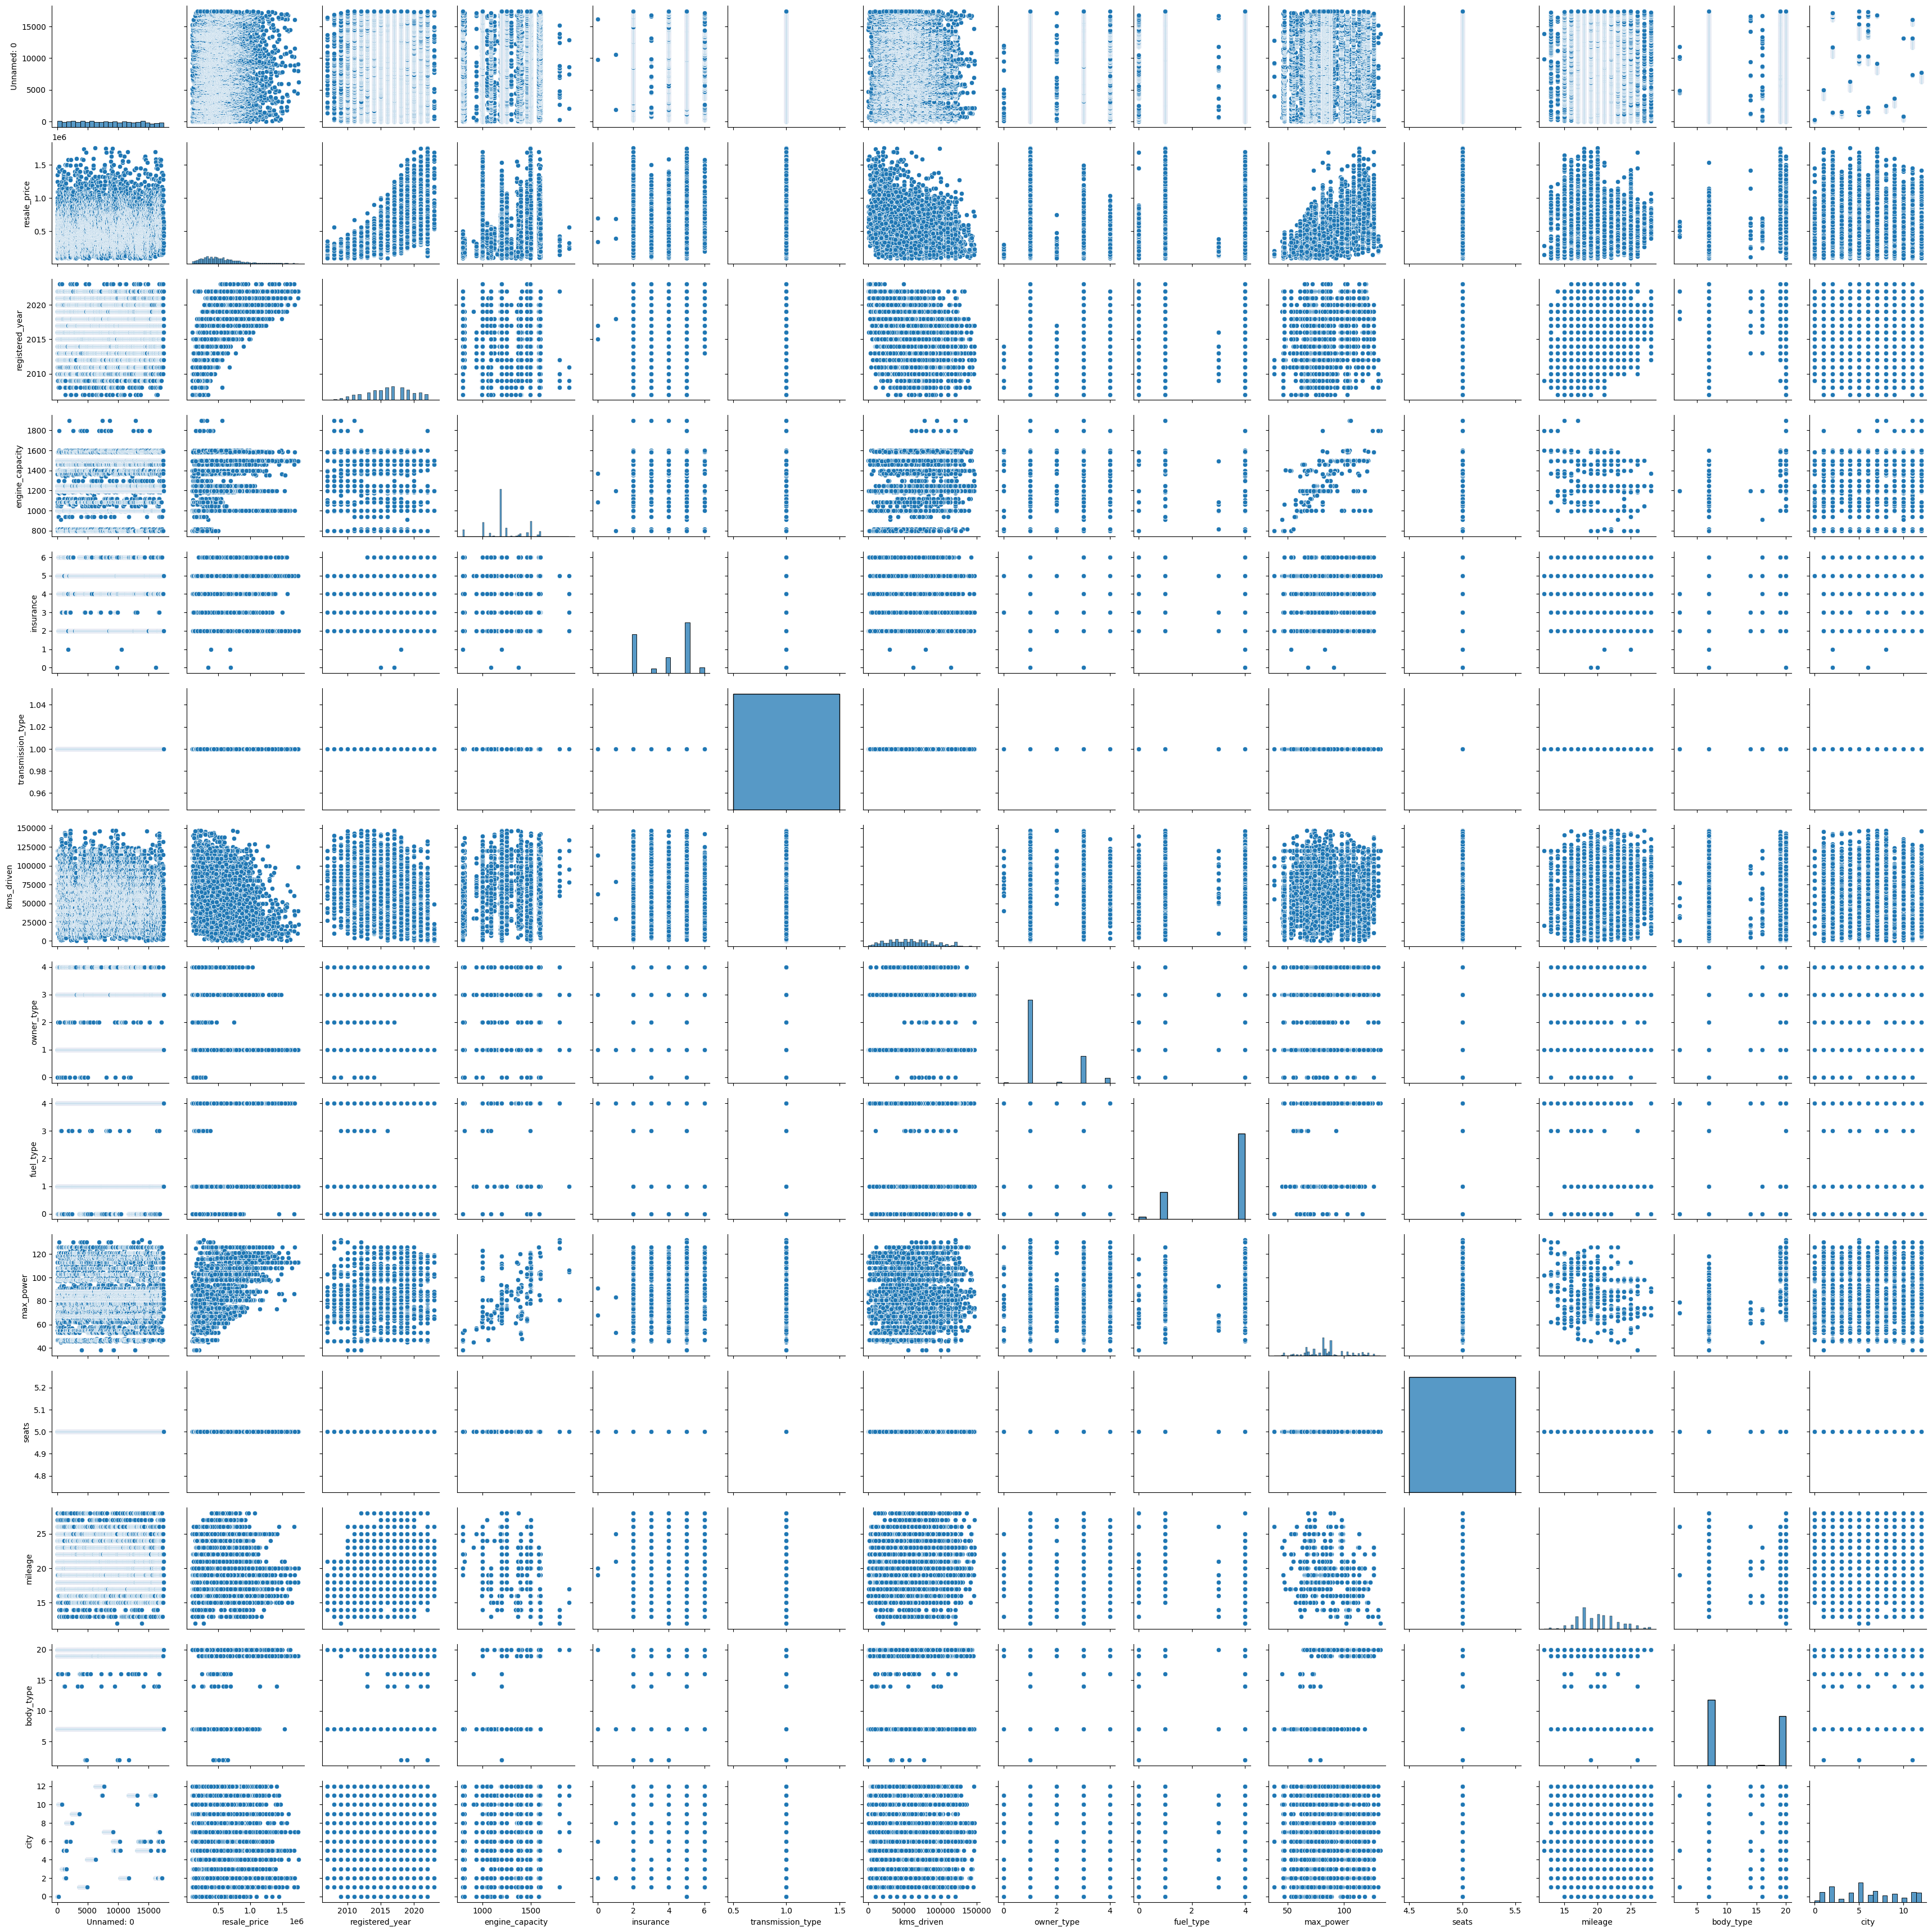

In [31]:
sns.pairplot(df)

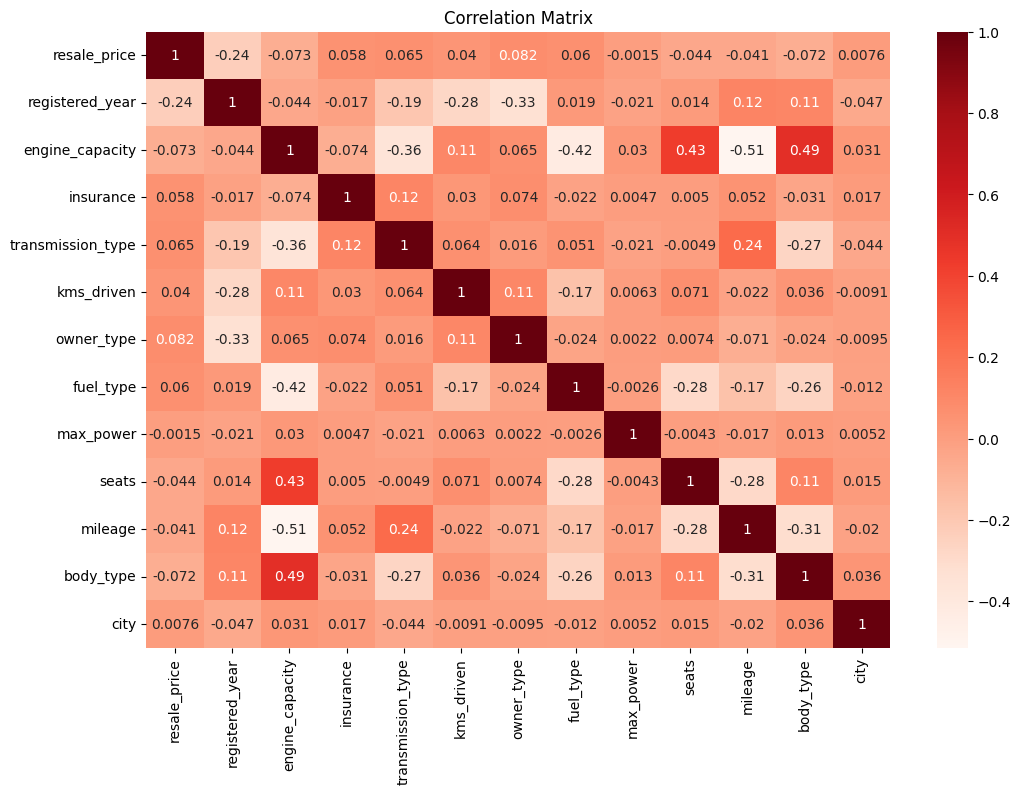

In [32]:
correlation_matrix=x.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

In [33]:
x=df.drop(['Unnamed: 0','full_name','resale_price'],axis=1)
x.head()

,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,2017,1197,5,1,40000,1,4,83,5.0,21,7,0
2,2015,1197,5,1,70000,3,4,83,5.0,20,20,0
3,2015,1197,5,1,70000,3,4,83,5.0,20,20,0
4,2009,1086,5,1,80000,1,4,68,5.0,19,7,0
5,2015,1197,5,1,70000,1,4,81,5.0,17,7,0


In [34]:
y=df['resale_price']
y.head()

0    545000
2    450000
3    450000
4    160000
5    470000
Name: resale_price, dtype: int64

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [36]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf_reg, n_features_to_select=4)

In [37]:
rfe

RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=4)

In [38]:
rf=rfe.fit(x_train, y_train)

In [39]:
col=rfe.support_col=x_train.columns[rfe.support_]
col

Index(['registered_year', 'engine_capacity', 'kms_driven', 'max_power'], dtype='object')

In [40]:
x=df[['registered_year', 'kms_driven', 'max_power', 'city']]
y=df['resale_price']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [42]:
x_train

,registered_year,kms_driven,max_power,city
11019,2018,68039,84,2
9041,2019,78000,108,7
1379,2021,17429,118,2
11150,2019,63133,98,2
12216,2020,12178,83,11
...,...,...,...,...
9478,2008,120000,81,6
8524,2018,50000,81,7
8906,2022,24000,113,7
1365,2015,52991,81,2


In [43]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [44]:
clf

RandomForestRegressor()

In [45]:
y_pred

array([407519.97, 367719.99, 792509.94, ..., 244050.  , 793450.  ,
       287329.93])

In [46]:
from sklearn import metrics

y_pred = clf.predict(x_test)

print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("R-Squared (R²):", metrics.r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE):", metrics.mean_absolute_percentage_error(y_test, y_pred))

Mean Squared Error (MSE): 10200099096.789093
Mean Absolute Error (MAE): 71124.37840359681
R-Squared (R²): 0.8426658054366842
Mean Absolute Percentage Error (MAPE): 0.15006351136280158
